### All scenarios, binary D4 graphed

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches


# Dictionary of scenarios with filenames
scenarios = {
    'avg45': './results/avg45/avg45_future_drought_predictions_with_binary.csv',
    'avg85': './results/avg85/avg85_future_drought_predictions_with_binary.csv',
    'wc45': './results/wc45/wc45_future_drought_predictions_with_binary.csv',
    'wc85': './results/wc85/wc85_future_drought_predictions_with_binary.csv',
    'wd45': './results/wd45/wd45_future_drought_predictions_with_binary.csv',
    'wd85': './results/wd85/wd85_future_drought_predictions_with_binary.csv'
}

# Scenario descriptions (for titles)
scenario_descriptions = {
    'avg45': 'CanESM2 with RCP 4.5',
    'avg85': 'CanESM2 with RCP 8.5',
    'wc45': 'CNRM-CM5 with RCP 4.5',
    'wc85': 'CNRM-CM5 with RCP 8.5',
    'wd45': 'HadGEM2-ES with RCP 4.5',
    'wd85': 'HadGEM2-ES with RCP 8.5'
}

# Create output directory if it doesn't exist
output_dir = './drought_plots'
os.makedirs(output_dir, exist_ok=True)

# Loop through each scenario and create a plot
for scenario_key, file_path in scenarios.items():
    # Extract RCP value from the key
    rcp = '4.5' if '45' in scenario_key else '8.5'
    
    # Load and preprocess
    df = pd.read_csv(file_path)
    # Convert the date column to datetime
    df['date'] = pd.to_datetime(df['date'])
    # Filter for 2050 to 2099
    start_date = '2050-01-01'
    end_date = '2099-12-31'
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    df = df.loc[mask].reset_index(drop=True)

    # Extract variables
    d0 = df['D0']
    d1 = df['D1']
    d2 = df['D2']
    d3 = df['D3']
    d4_binary = df['D4_binary_pred']  # binary: 1 for presence, 0 for absence

    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(18, 6))

    # Plot D0–D3 as stacked area
    ax1.stackplot(df['date'], d3, d2, d1, d0,
                labels=['D3', 'D2', 'D1', 'D0'],
                colors=['#e60001', '#ffaa01', '#fbd47f', '#ffff00'])
    ax1.set_ylabel("Total Percent Land Area (D0–D3)")
    ax1.set_ylim(0, 100)
    ax1.set_title(f"Drought Severity with D4 Periods Highlighted, 2050-2099, {scenario_descriptions[scenario_key]}")
    ax1.legend(loc='upper left')

    # Identify and shade D4 periods
    in_block = False
    start_date = None
    d4_regions = []

    for i in range(len(df)):
        if d4_binary.iloc[i] == 1 and not in_block:
            start_date = df['date'].iloc[i]
            in_block = True
        elif d4_binary.iloc[i] == 0 and in_block:
            end_date = df['date'].iloc[i]
            span = ax1.axvspan(start_date, end_date, color='#730000', alpha=0.7)
            d4_regions.append(span)
            in_block = False

    # If still in a D4 block at the end
    if in_block:
        span = ax1.axvspan(start_date, df['date'].iloc[-1], color='#730000', alpha=0.7)
        d4_regions.append(span)

    # Create a custom legend entry for D4
    d4_patch = mpatches.Patch(color='#730000', alpha=0.7, label='D4')
    
    # Get the legend handles and labels from the stackplot
    handles, labels = ax1.get_legend_handles_labels()
    
    # Add the D4 patch to the legend
    handles.insert(0, d4_patch)
    labels.insert(0, 'D4')
    
    # Create the legend with all elements
    ax1.legend(handles=handles, loc='upper left')

    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f"{output_dir}/{scenario_key}_drought_plot.png", dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close the figure to free memory

print(f"All plots saved to {output_dir} directory")

All plots saved to ./drought_plots directory


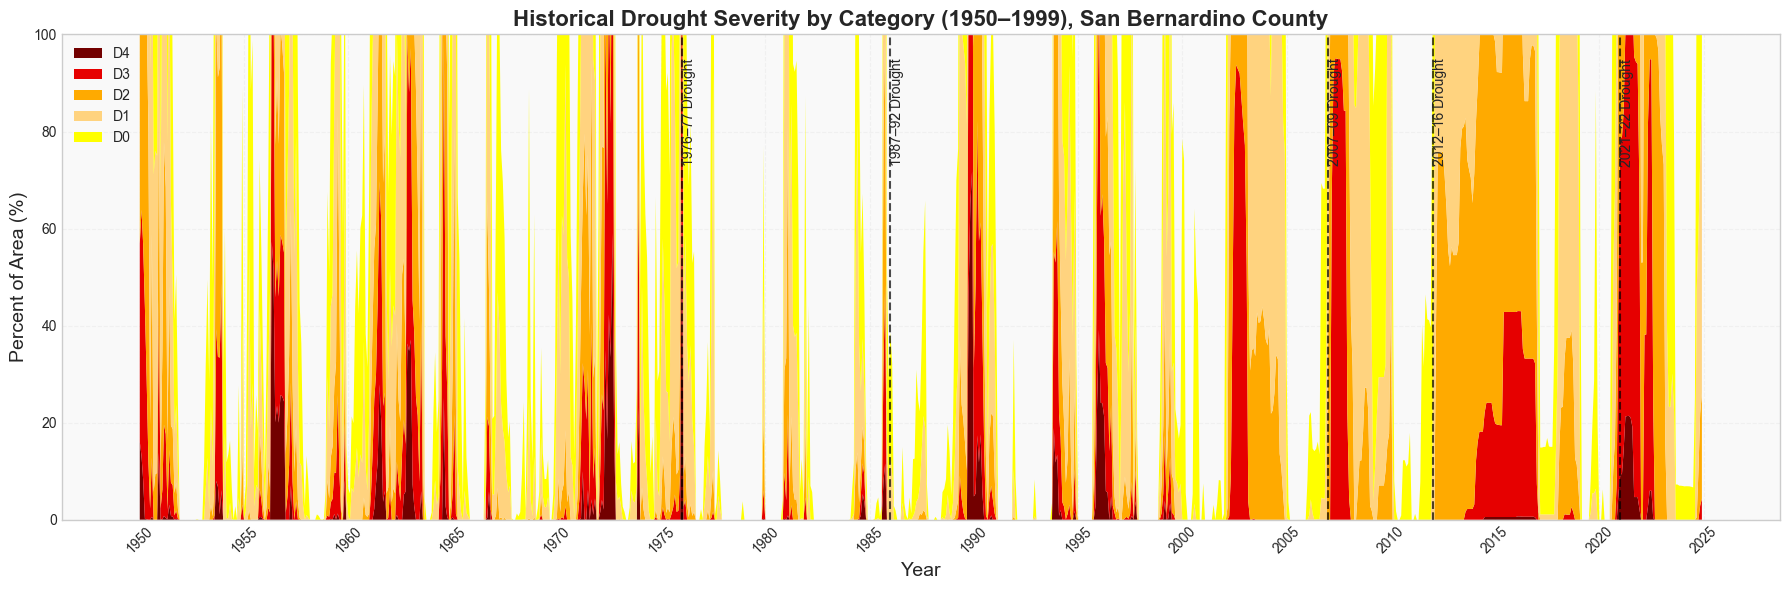

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Load historical data
df = pd.read_csv('./final_historical.csv')
df['date'] = pd.to_datetime(df['date'])

# Filter to 1950–1999
df = df[(df['date'] >= '1950-01-01') & (df['date'] <= '2024-12-31')].reset_index(drop=True)

# Extract D0–D4
d0, d1, d2, d3, d4 = df['D0'], df['D1'], df['D2'], df['D3'], df['D4']

# Color palette from most to least severe
drought_colors = ['#730000', '#E60000', '#FFAA00', '#FFD37F', '#FFFF00']

# Plot setup
fig, ax = plt.subplots(figsize=(18, 6))
ax.stackplot(df['date'], d4, d3, d2, d1, d0,
             labels=['D4', 'D3', 'D2', 'D1', 'D0'],
             colors=drought_colors)

# Full drought periods (with start and end)
drought_blocks = [
    ('1976–77 Drought', '1976-01-01', '1977-12-31'),
    ('1987–92 Drought', '1986-01-01', '1992-12-31'),
    ('2007–09 Drought', '2007-01-01', '2009-12-31'),
    ('2012–16 Drought', '2012-01-01', '2016-12-31'),
    ('2021–22 Drought', '2021-01-01', '2022-12-31')

]

# Add shaded regions and vertical labels
for label, start, end in drought_blocks:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    
    if df['date'].min() <= end_date and df['date'].max() >= start_date:
        # Shade the full drought duration
        # ax.axvspan(start_date, end_date, color='#730000', alpha=0.25)
        # Add vertical label at the start
        ax.axvline(start_date, color='black', linestyle='--', alpha=0.7)
        ax.text(start_date, 95, label, rotation=90, verticalalignment='top', fontsize=10)

# Axis formatting
ax.set_title('Historical Drought Severity by Category (1950–1999), San Bernardino County',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percent of Area (%)', fontsize=14)
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3)

# Year ticks every 5 years
ax.xaxis.set_major_locator(YearLocator(5))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Legend in same position as future graph
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import time
import os
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')

# Set better styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.facecolor'] = '#f9f9f9'
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#dddddd'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.alpha'] = 0.7

from treeffuser import Treeffuser
print("TreeFFuser successfully imported")

# Create results directory
os.makedirs('results', exist_ok=True)
# Create drought_plots directory
os.makedirs('drought_plots', exist_ok=True)

def print_section(title):
    print("\n" + "="*80)
    print(f" {title} ".center(80, "="))
    print("="*80)

start_time = time.time()

# Load historical data
historical_df = pd.read_csv('final_historical.csv')
historical_df['date'] = pd.to_datetime(historical_df['date'])
historical_df = historical_df.sort_values('date')
historical_df = historical_df[(historical_df['date'].dt.year >= 1950) & (historical_df['date'].dt.year <= 2024)]

# Add temporal features
historical_df['month'] = historical_df['date'].dt.month
historical_df['year'] = historical_df['date'].dt.year
historical_df['month_sin'] = np.sin(2 * np.pi * historical_df['month'] / 12)
historical_df['month_cos'] = np.cos(2 * np.pi * historical_df['month'] / 12)
historical_df['quarter'] = ((historical_df['month'] - 1) // 3) + 1
for q in range(1, 5):
    historical_df[f'quarter_{q}'] = (historical_df['quarter'] == q).astype(int)

# Define targets
target_cols = ['D0', 'D1', 'D2', 'D3', 'D4']

# Feature engineering
def create_lag_features(df, target_cols, lag_periods=[1, 2, 3, 6, 12], window_sizes=[3, 6, 12]):
    df = df.copy()
    df = df.sort_values('date')
    for col in target_cols:
        for lag in lag_periods:
            df[f'{col}_lag_{lag}'] = df[col].shift(lag)
        for window in window_sizes:
            df[f'{col}_roll_mean_{window}'] = df[col].rolling(window, min_periods=1).mean()
            df[f'{col}_roll_std_{window}'] = df[col].rolling(window, min_periods=1).std()
    for col in ['airtemp', 'rainfall', 'sm']:
        for window in window_sizes:
            df[f'{col}_roll_{window}'] = df[col].rolling(window, min_periods=1).mean()
    df['temp_rain_ratio'] = df['airtemp'] / (df['rainfall'] + 0.1)
    df['sm_runoff_ratio'] = df['sm'] / (df['runoff'] + 0.1)
    return df

lag_periods = [1, 2, 3, 6, 12]
window_sizes = [3, 6, 12]
historical_df_features = create_lag_features(historical_df, target_cols, lag_periods, window_sizes)
historical_df_features = historical_df_features.dropna().reset_index(drop=True)

# Train and predict
feature_cols = [col for col in historical_df_features.columns if col not in target_cols + ['date']]
X = historical_df_features[feature_cols]
y_data = historical_df_features[target_cols]

models = {}
predictions = []
results = {}

# Define colors for each drought class (matching the stacked plot colors)
drought_colors = {
    'D0': '#f96600',
    'D1': '#f96600',
    'D2': '#f96600',
    'D3': '#f96600',
    'D4': '#f96600'
}

for i, col in enumerate(target_cols):
    print(f"\nProcessing {col}...")
    y = y_data[col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train TreeFFuser
    try:
        model = Treeffuser(n_estimators=100, seed=42)
        model.fit(X_scaled, y.values.reshape(-1, 1))
    except:
        from sklearn.ensemble import RandomForestRegressor
        print("  TreeFFuser failed, using RandomForest fallback.")
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_scaled, y)

    # Predict
    if isinstance(model, Treeffuser):
        y_pred = model.sample(X_scaled, n_samples=100).mean(axis=0)
        if len(y_pred.shape) > 1:
            y_pred = y_pred.ravel()
    else:
        y_pred = model.predict(X_scaled)

    # ✅ Clip predictions to 0–100
    y_pred = np.clip(y_pred, 0, 100)

    # Metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    results[col] = {'R2': r2, 'MAE': mae}
    predictions.append(y_pred)
    models[col] = model

    # Create improved individual plot with consistent styling - FIXED THIS PART
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(111)  # This creates the axes
    
    # Plot actual and predicted values with thicker lines
    ax.plot(historical_df_features['date'], y, label='Actual', linewidth=1.8, color='#0047AB')
    ax.plot(historical_df_features['date'], y_pred, label='Predicted', 
             linestyle='--', linewidth=1.5, color=drought_colors[col])
    
    # Improved styling
    ax.set_title(f"TreeFFuser Prediction: {col} | MAE: {mae:.4f} | R²: {r2:.4f}", 
              fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax.set_ylabel("Percent Area", fontsize=12, fontweight='bold')
    
    # Format x-axis to show years only
    ax.xaxis.set_major_locator(mpl.dates.YearLocator(10))  # Show every 10 years
    ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    
    # Add subtle spines
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('#dddddd')
        spine.set_linewidth(1)
    
    # Better grid
    ax.grid(True, linestyle='--', alpha=0.7, color='#dddddd')
    
    # Improved legend
    legend = ax.legend(frameon=True, framealpha=0.9, edgecolor='#dddddd')
    legend.get_frame().set_facecolor('#f9f9f9')
    
    plt.tight_layout(pad=3)
    
    # Save individual plot to drought_plots directory
    plt.savefig(f"drought_plots/treeffuser_{col}_prediction.png", dpi=300, bbox_inches='tight')
    plt.close(fig)
    print(f"  Saved {col} plot to drought_plots/treeffuser_{col}_prediction.png")

# Summary
print("\nModel Performance Summary:")
for col in target_cols:
    print(f"{col} - MAE: {results[col]['MAE']:.4f}, R²: {results[col]['R2']:.4f}")

# Save predictions
pred_df = pd.DataFrame(np.array(predictions).T, columns=target_cols)
pred_df.insert(0, 'date', historical_df_features['date'])
for col in target_cols:
    pred_df[col] = np.clip(pred_df[col], 0, 100)  # Redundant safety

output_file = 'results/historical_predicted_drought_treeffuser.csv'
pred_df.to_csv(output_file, index=False)
print(f"\n✅ Saved predictions to '{output_file}'")

# Create improved stacked area chart matching the styling of the other scenario plots
fig, ax = plt.subplots(figsize=(18, 6))

# Plot the stacked area chart in the correct order (D4 on bottom, D0 on top)
ax.stackplot(pred_df['date'],
             pred_df['D4'],
             pred_df['D3'],
             pred_df['D2'],
             pred_df['D1'],
             pred_df['D0'],
             labels=['D4', 'D3', 'D2', 'D1', 'D0'],
             colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'],
             alpha=0.8)

# Improved styling
ax.set_ylabel("Total Percent Land Area", fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_title("Historical Drought Coverage, 1950-2024\nTreeFFuser Predicted Values", 
             fontsize=14, fontweight='bold', pad=10)

# Format x-axis to show years only
ax.xaxis.set_major_locator(mpl.dates.YearLocator(10))  # Show every 10 years
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Add subtle spines
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('#dddddd')
    spine.set_linewidth(1)

# Create the legend with better styling
legend = ax.legend(loc='upper left', frameon=True, framealpha=0.9, edgecolor='#dddddd')
legend.get_frame().set_facecolor('#f9f9f9')

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7, color='#dddddd')

# Add some padding
plt.tight_layout(pad=3)

# Save the stacked plot
plt.savefig("drought_plots/treeffuser_historical_stacked.png", dpi=300, bbox_inches='tight')
plt.close(fig)
print(f"\n✅ Saved stacked historical plot to drought_plots/treeffuser_historical_stacked.png")

# Total time
print(f"\nExecution time: {time.time() - start_time:.2f} seconds")

TreeFFuser successfully imported

Processing D0...
  Saved D0 plot to drought_plots/treeffuser_D0_prediction.png

Processing D1...
